# 1. Start Simple: Train a Baseline Model Without Any Tuning

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=25)

# Initialize model with default parameters
model = DecisionTreeClassifier()

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')

Baseline Accuracy: 0.93


# 2. Use Hyperparameter Search with Cross-Validation

### Define hyperparameter grid

In [5]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=25)

# Initialize model
model = DecisionTreeClassifier()

# Define hyperparameter grid for Grid Search
param_grid = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10]
}

### Use cross-validation

In [6]:
from sklearn.model_selection import cross_val_score

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f'Best Parameters (Grid Search): {best_params_grid}')
print(f'Best Cross-Validation Score (Grid Search): {best_score_grid:.2f}')

Best Parameters (Grid Search): {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best Cross-Validation Score (Grid Search): 0.97


# 3. Use Randomized Search for Initial Exploration

### Define hyperparameter distribution

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Initialize model
model = DecisionTreeClassifier()

# Define hyperparameter distribution for Random Search
param_dist = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [None] + list(range(10, 31)),
	'min_samples_split': range(2, 11),
	'min_samples_leaf': range(1, 11)
}

### Set up randomized search with cross-validation

In [10]:
# Random Search
random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f'Best Parameters (Random Search): {best_params_random}')
print(f'Best Cross-Validation Score (Random Search): {best_score_random:.2f}')

Best Parameters (Random Search): {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 11, 'criterion': 'entropy'}
Best Cross-Validation Score (Random Search): 0.96


### Evaluate the model

In [11]:
best_model = DecisionTreeClassifier(**best_params_random)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f'Final Model Accuracy: {final_accuracy:.2f}')

Final Model Accuracy: 1.00


# 4. Monitor Overfitting with Validation Curves

### n_estimators

In [12]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter range
param_range = [10, 100, 200, 400, 800, 1000]

# Calculate validation curve
train_scores, test_scores = validation_curve(
	RandomForestClassifier(), X_train, y_train,
	param_name="n_estimators", param_range=param_range,
	cv=5, scoring="accuracy")

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

### Plot validation curve

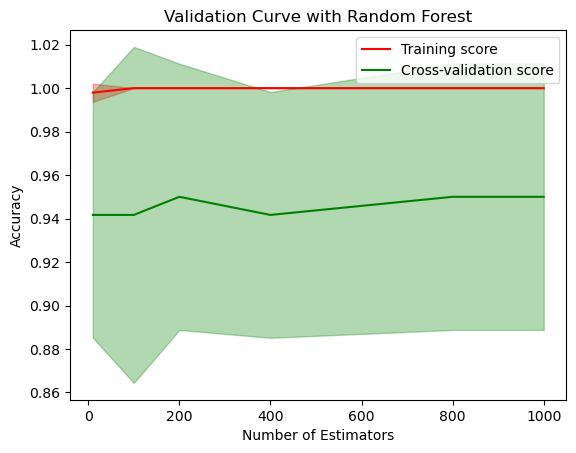

In [13]:
# Plot validation curve
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.3)
plt.plot(param_range, test_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="g", alpha=0.3)
plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# 5. Use Bayesian Optimization for Efficient Search

### Define the hyperparameter space

In [18]:
# pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=25)

# Initialize model
model = DecisionTreeClassifier()

# Define hyperparameter space for Bayesian Optimization
param_space = {
	'criterion': ['gini', 'entropy'],
	'max_depth': [None] + list(range(10, 31)),
	'min_samples_split': (2, 10),
	'min_samples_leaf': (1, 10)
}

### Set up Bayesian optimization with cross-validation

In [16]:
# Bayesian Optimization
opt = BayesSearchCV(model, param_space, n_iter=32, cv=5, scoring='accuracy')
opt.fit(X_train, y_train)
best_params_bayes = opt.best_params_
best_score_bayes = opt.best_score_

print(f'Best Parameters (Bayesian Optimization): {best_params_bayes}')
print(f'Best Cross-Validation Score (Bayesian Optimization): {best_score_bayes:.2f}')

Best Parameters (Bayesian Optimization): OrderedDict([('criterion', 'gini'), ('max_depth', 25), ('min_samples_leaf', 1), ('min_samples_split', 2)])
Best Cross-Validation Score (Bayesian Optimization): 0.97


### Evaluate the model

In [17]:
best_model = DecisionTreeClassifier(**best_params_bayes)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f'Final Model Accuracy: {final_accuracy:.2f}')

Final Model Accuracy: 0.93
